In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [3]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler

In [4]:
wine_data = load_wine()
X = wine_data.data
y = wine_data.target

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
pca = PCA(n_components=2)
X_reduced_pca = pca.fit_transform(X)

In [7]:
lda = LDA(n_components=2)
X_reduced_lda = lda.fit_transform(X, y)

In [8]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 ])

In [9]:
lda.explained_variance_ratio_

array([0.68747889, 0.31252111])

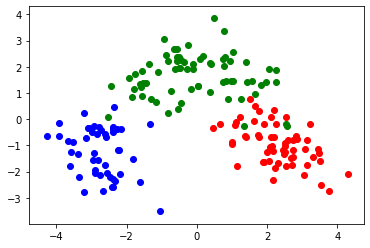

In [10]:
plt.scatter(X_reduced_pca[y==0, 0], X_reduced_pca[y==0, 1], color='r')
plt.scatter(X_reduced_pca[y==1, 0], X_reduced_pca[y==1, 1], color='g')
plt.scatter(X_reduced_pca[y==2, 0], X_reduced_pca[y==2, 1], color='b')
plt.show()

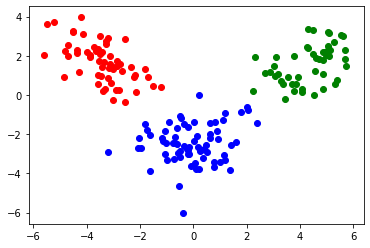

In [11]:
plt.scatter(X_reduced_lda[y==0, 0], X_reduced_lda[y==0, 1], color='r')
plt.scatter(X_reduced_lda[y==1, 0], X_reduced_lda[y==1, 1], color='b')
plt.scatter(X_reduced_lda[y==2, 0], X_reduced_lda[y==2, 1], color='g')
plt.show()

In [23]:
# !pip install mlxtend

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [25]:
from mlxtend.plotting import plot_decision_regions, plot_confusion_matrix

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced_lda, y, test_size=0.2)

In [27]:
X_reduced_lda.shape

(178, 2)

In [29]:
X_train.shape

(142, 2)

In [30]:
X_test.shape

(36, 2)

In [31]:
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

In [32]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

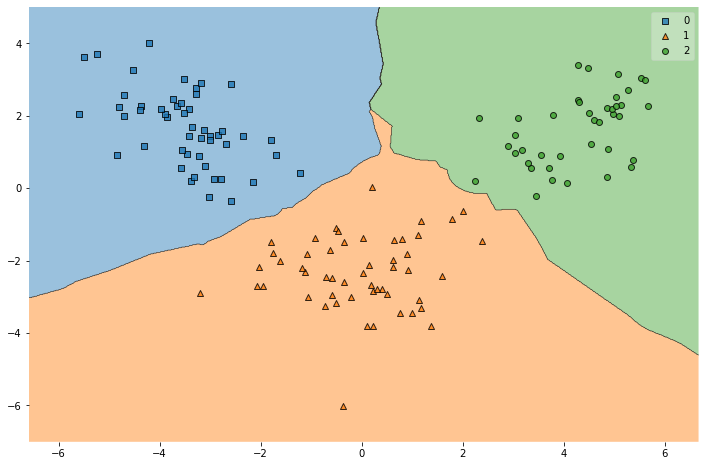

In [33]:
plt.figure(figsize=(12,8))
plot_decision_regions(X_train, y_train, knn,)
plt.show()

In [34]:
y_pred = knn.predict(X_test)

In [35]:
y_pred

array([1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0,
       1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 0])

In [36]:
y_test

array([1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0,
       1, 0, 0, 1, 1, 2, 1, 0, 2, 2, 1, 1, 2, 0])

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)

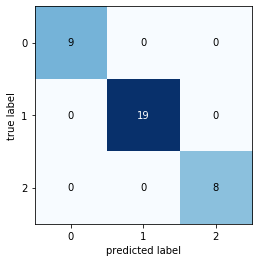

In [38]:
plot_confusion_matrix(conf_matrix)
plt.show()

In [39]:
accuracy_score(y_test, y_pred) * 100

100.0

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



In [41]:
test_case = [ [0.25, -5], [2.1, 0.75], [-1, 1]]

In [42]:
knn.predict(test_case)

array([1, 2, 0])

In [43]:
knn.predict_proba(test_case)

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])